In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
class meraLR:

    def __init__(self):
        self.coef=None
        self.intercept = None
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept = betas[0]
        self.coef = betas[1:]
    def predict(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept

In [13]:
# Dummy data
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])

# Train model
model = meraLR()
model.fit(X, y)

# Predict
X_test = np.array([[5], [6]])
print(model.predict(X_test))  # Should print [10, 12]


[10. 12.]


In [116]:
df = pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [120]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Date_Num'] = df['Dates'].map(pd.Timestamp.toordinal)

C:\Users\Suraj\AppData\Local\Temp\ipykernel_22668\2449635920.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Dates     48 non-null     datetime64[ns]
 1   Prices    48 non-null     float64       
 2   Date_Num  48 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 KB


In [124]:
lr = LinearRegression()

In [133]:
X = df[['Date_Num']]

In [135]:
y = df['Prices']

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [139]:
lr.fit(X_train,y_train)

LinearRegression()

In [141]:
lr.intercept_

-1030.7202676478598

In [143]:
lr.coef_

array([0.001411])

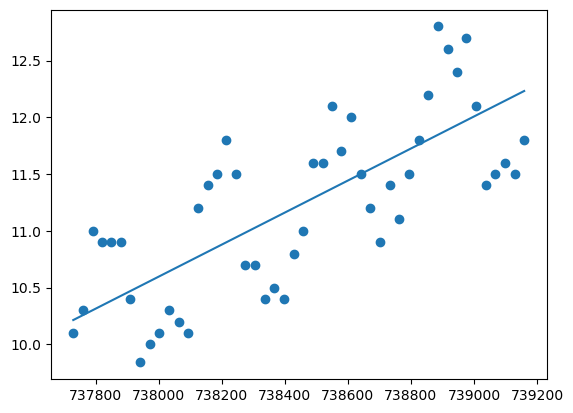

In [145]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X))